# Alura Challenge - Data Science - Week 2

Guilherme Lupinari Volpato
E-mail: lv.gui97@gmail.com
Github: https://github.com/LupiVolpi

You have been hired as a data scientist by the *telecom operator Alura Voz*. In the initial meeting with the people responsible for the company's *sales area*, the importance of reducing the Customer Evasion Rate, known as *Churn Rate*, was explained. Basically, the Churn Rate indicates how much the company lost revenue or customers in a period of time.


### *Week 2 Challenges:*
- Analyse the target variable *churn*
- Visualize the distribution of the *churn* variable
- Create relevant visualizations regarding the *churn* variable
- Analyse the correlation of the variables
- Test different types of graphs.


### *Data index:*
- *customerID:* each customer's unique identification number.
- *Churn:* whether the client has left the company or not.
- *gender:* Male or Female (according to the database).
- *SeniorCitizen:* whether a client is 65 years of age or older.
- *Partner:* whether the client is partnered or not.
- *Dependents:* whether the client has got dependents or not.
- *tenure:* duration (in months) of the client's contract with the company.
- *PhoneService:* whether the client has hired the companie's phone service.
- *MultipleLines:* whether the client has hired more than one phone line.
- *InternetService:* whether the client has hired a provider of internet.
- *OnlineSecurity:* whether the client has hired an additional online security membership.
- *OnlineBackup:* whether the client has hired an additional online backup membership.
- *DeviceProtection:* whether the client has hired an additional device protection membership.
- *TechSupport:* whether the client has hired an additional technical support membership (with decreased waiting time for services).
- *StreamingTV:* whether the client has hired the cable TV service.
- *StreamingMovies:* whether the client has hired a movie streaming membership.
- *Contract:* the type of the client's contract.
- *PaperlessBilling:* whether the client prefers to receive his billings online.
- *PaymentMethod:* the client's prefered method of payment.
- *Charges.Monthly:* the monthly sum of the client's hired services and membreships.
- *Charges.Total:* the total sum of the client's hired services and memberships.

---
# Importing libraries and Setting preferences

In [29]:
import pandas as pd

pd.set_option("display.max_rows", 100) # Pandas will display 100 DataFrame rows at most.
pd.set_option("display.max_columns", None) # Pandas won't collapse DataFrame columns visualization.
pd.set_option("display.max_colwidth", None) # Pandas will display all the information in each column, regardless of how large the values are.

import matplotlib.pyplot as plt

---
# Importing the treated data from week 1

In [18]:
data_treated = pd.read_json(path_or_buf = "https://raw.githubusercontent.com/LupiVolpi/alura_challenge_data_science/main/datasets/data_treated.json")

data_treated.head(5)

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,services_hired,contract,paperless_billing,payment_method,charges_daily,charges_monthly,charges_total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,5,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,4,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,3,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,6,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,4,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


---
# Analysing the *churn* variable

#### <font color = "Blue"> 1. Basic information.

Text(0.5, 1.0, 'Customers that have left the company (Churn)')

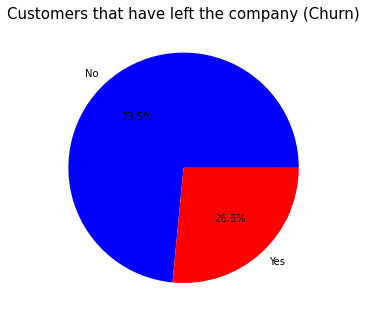

In [49]:
fig1 = plt.figure(figsize = (5, 4))
axis1 = fig1.add_axes([0, 0, 1, 1])

labels = data_treated["churn"].value_counts().index

axis1.pie(data_treated["churn"].value_counts(normalize = True).round(decimals = 4) * 100, labels = labels, colors = ["blue", "red"], autopct = "%.1f%%")
axis1.set_title("Customers that have left the company (Churn)", fontsize = 15, pad = 5)

##### <font color = "Green"> Approximately 26,54% of the customers have left the company.

Text(0.5, 1.0, 'Customers by gender')

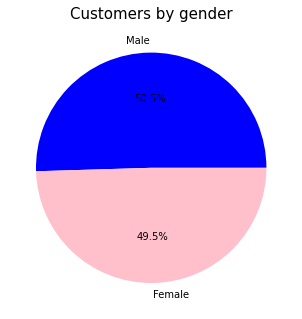

In [45]:
fig2 = plt.figure(figsize = (5, 4))
axis2 = fig2.add_axes([0, 0, 1, 1])

labels = data_treated["gender"].value_counts().index

axis2.pie(data_treated["gender"].value_counts(normalize = True).round(decimals = 4) * 100, labels = labels, colors = ["blue", "pink"], autopct = "%.1f%%")
axis2.set_title("Customers by gender", fontsize = 15, pad = 5)

##### <font color = "Green"> The customer base is almost equally divided between male and female.

Text(0.5, 1.0, 'Churn by gender')

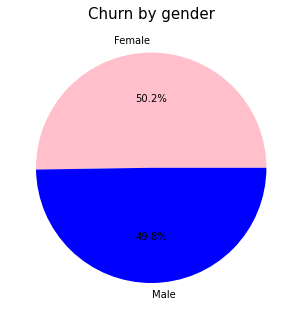

In [53]:
fig3 = plt.figure(figsize = (5, 4))
axis3 = fig3.add_axes([0, 0, 1, 1])

labels = data_treated.query("churn == 'Yes'")["gender"].value_counts().index

axis3.pie(data_treated.query("churn == 'Yes'")["gender"].value_counts(normalize = True).round(decimals = 4) * 100, labels = labels, autopct = "%.1f%%", colors = ["pink", "blue"])
axis3.set_title("Churn by gender", fontsize = 15, pad = 5)

##### <font color = "Green"> Customers who have left the company are almost equally divided between male and female.


[Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'Total'), Text(3, 0, 'Max')]

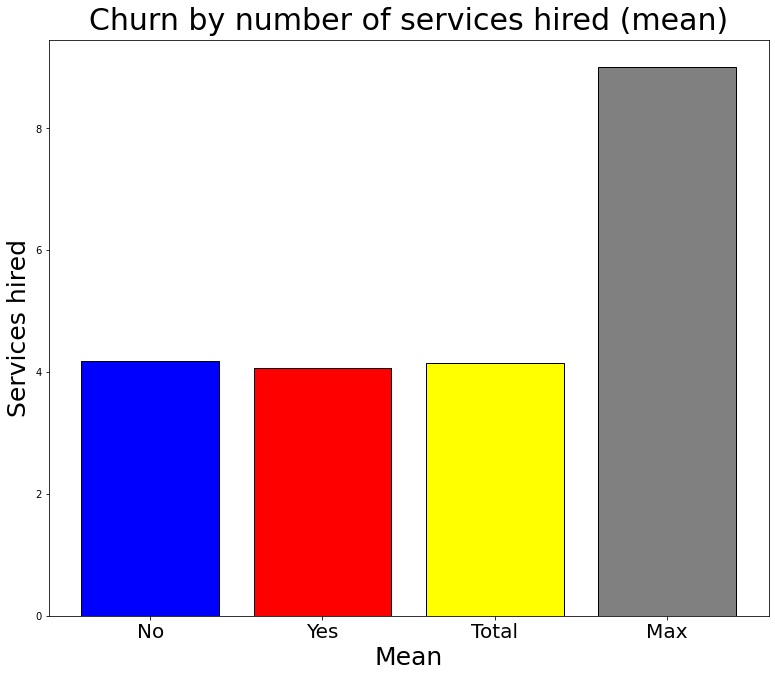

In [65]:
fig4 = plt.figure(figsize = (10,8))
axis4 = fig4.add_axes([0, 0, 1, 1])

data = [data_treated.query("churn == 'No'")["services_hired"].mean(), data_treated.query("churn == 'Yes'")["services_hired"].mean(), data_treated["services_hired"].mean(), data_treated["services_hired"].max()]
index = range(len(data))
xlabels = ["No", "Yes", "Total", "Max"]

axis4.bar(index, data, color = ["blue", "red", "yellow", "gray"], edgecolor = "black")
axis4.set_title("Churn by number of services hired (mean)", fontsize = 30, pad = 10)
axis4.set_xlabel("Mean", fontsize = 25)
axis4.set_ylabel("Services hired", fontsize = 25)

axis4.set_xticks(index)
axis4.set_xticklabels(xlabels, fontsize = 20)

##### <font color = "Green"> A customer, on average, hires 4 out of 9 different services from the company, regardless of having left the company or not.

C:\Users\lvgui\anaconda3\lib\site-packages\numpy\lib\stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
C:\Users\lvgui\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


[Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'Total'), Text(3, 0, 'Max')]

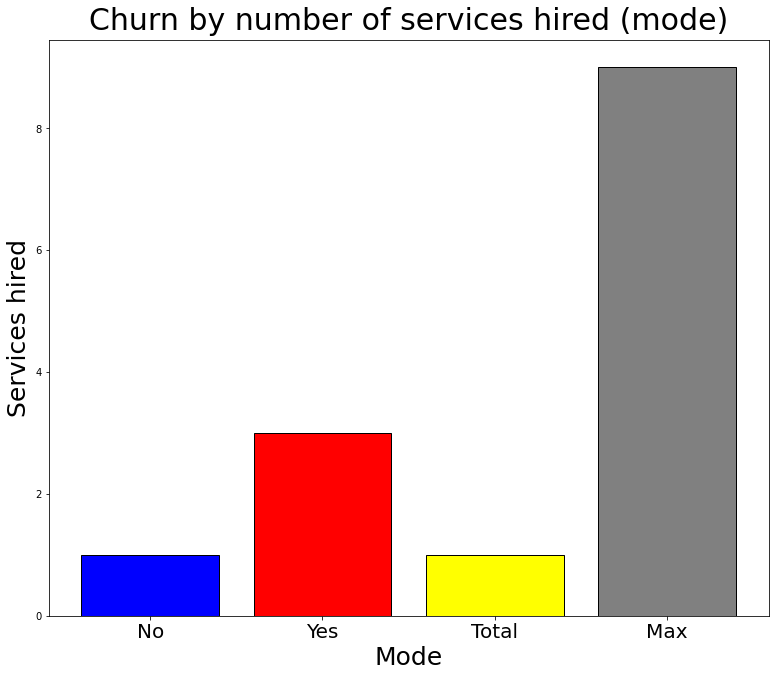

In [66]:
fig5 = plt.figure(figsize = (10,8))
axis5 = fig5.add_axes([0, 0, 1, 1])

data = [data_treated.query("churn == 'No'")["services_hired"].mode(), data_treated.query("churn == 'Yes'")["services_hired"].mode(), data_treated["services_hired"].mode(), data_treated["services_hired"].max()]
index = range(len(data))
xlabels = ["No", "Yes", "Total", "Max"]

axis5.bar(index, data, color = ["blue", "red", "yellow", "gray"], edgecolor = "black")
axis5.set_title("Churn by number of services hired (mode)", fontsize = 30, pad = 10)
axis5.set_xlabel("Mode", fontsize = 25)
axis5.set_ylabel("Services hired", fontsize = 25)

axis5.set_xticks(index)
axis5.set_xticklabels(xlabels, fontsize = 20)

##### <font color = "green"> The most frequently seen number of services hired among customer who have left the company is 3, whereas the mode for customers who haven't left the company is 1 service hired.

64.7616924605992

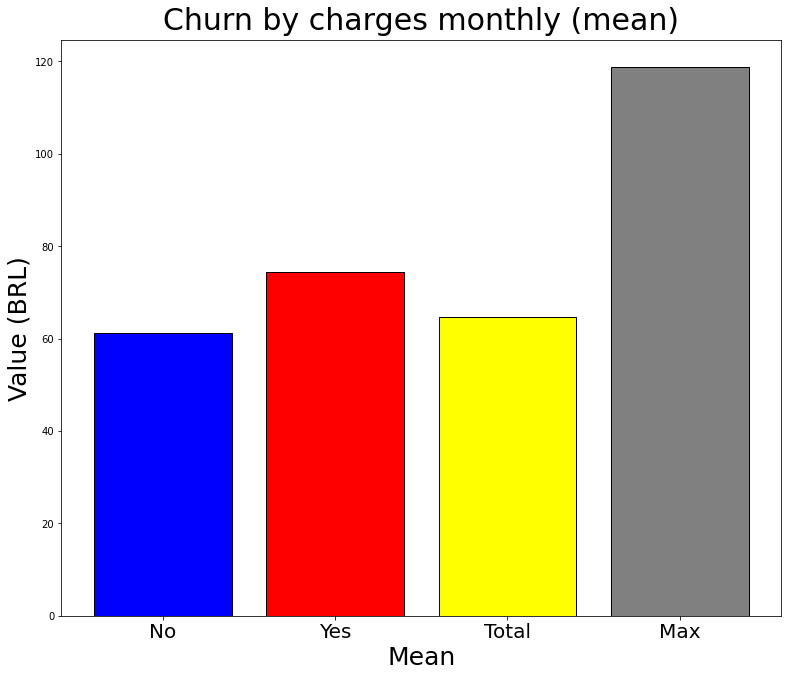

In [68]:
fig6 = plt.figure(figsize = (10,8))
axis6 = fig6.add_axes([0, 0, 1, 1])

data = [data_treated.query("churn == 'No'")["charges_monthly"].mean(), data_treated.query("churn == 'Yes'")["charges_monthly"].mean(), data_treated["charges_monthly"].mean(), data_treated["charges_monthly"].max()]
index = range(len(data))
xlabels = ["No", "Yes", "Total", "Max"]

axis6.bar(index, data, color = ["blue", "red", "yellow", "gray"], edgecolor = "black")
axis6.set_title("Churn by charges monthly (mean)", fontsize = 30, pad = 10)
axis6.set_xlabel("Mean", fontsize = 25)
axis6.set_ylabel("Value (BRL)", fontsize = 25)

axis6.set_xticks(index)
axis6.set_xticklabels(xlabels, fontsize = 20)

data_treated["charges_monthly"].mean()

##### <font color = "Green"> A customer that has left the company has spent, on average, around 74,44 BRL monthly with the company's services, whereas customers ho haven't left spend around 61.27 BRL monthly.

#### <font color = "Blue"> 2. More information about the *churn* variable.


In [43]:
data_treated.query("churn == 'Yes'")[["partner", "dependents"]].value_counts(normalize = True) * 100

partner  dependents
No       No            60.085607
Yes      No            22.471910
         Yes           13.322632
No       Yes            4.119850
dtype: float64

##### <font color = "Green"> A little more than 60% of customers who have left the company are neither partnered nor have dependents.

In [24]:
# Just for comparison, this number is fairly different for customers who haven't left the company.

data_treated.query("churn == 'No'")[["partner", "dependents"]].value_counts(normalize = True) * 100

partner  dependents
No       No            41.689215
Yes      Yes           28.991109
         No            23.830692
No       Yes            5.488983
dtype: float64

#### <font color = "Blue"> 3. Grouping the DataFrame by the *churn* variable.

##### Using the groupby() method, we can divide all entries of the DataFrame by the *churn* variable to draw further insight from integer or float data.

In [25]:
data_by_churn = data_treated.groupby(by = "churn")

In [26]:
data_by_churn["tenure"].agg(func = ["min", "mean", "max"])

,min,mean,max
churn,,,
No,0,37.569965,72
Yes,1,17.979133,72


##### <font color = "Green"> The average tenure of customers who have left the company is a little below 18 months.

In [27]:
data_by_churn[["charges_monthly", "charges_total"]].agg(func = ["min", "mean", "max"])

charges_monthly                    charges_total                      
                  min       mean     max           min         mean      max
churn                                                                       
No              18.25  61.265124  118.75          0.00  2549.911442  8672.45
Yes             18.85  74.441332  118.35         18.85  1531.796094  8684.80

##### <font color = "Green"> The customers who have left the company have spent, on average, around *74,44* with the company's services, which is around *13,00* more than the average customer who hasn't left the company.

In [28]:
data_by_churn["services_hired"].agg(func = ["min", "mean", "max"])

,min,mean,max
churn,,,
No,1,4.173174,9
Yes,1,4.071696,9


##### <font color = "Green"> No obvious difference can be seen between the consumption habits of customers that have left and the ones that stayed with the company.

---
# Visualizing the distribution of the *churn* variable

---
# Applying other relevant visualization methods for the *churn* variable

---
# Analysing the correlation between the variables